# Ch14 结构嵌套模型的G估计

## 内容摘要

在前两章中，我们描述了IP权重和标准化，以估计戒烟对体重增加的平均因果关系。在本章中，我们描述了估计平均因果效应的第三种方法：g估计。我们使用相同的NHEFS观测数据，并提供简单的计算机代码来进行分析。

IP加权，标准化和g估计通常统称为g方法，because they are designed for application to generalized treatment contrasts involving treatments that vary over time. 本书第二部分中将g方法应用于不会随时间变化的治疗方法 may then be overkill since there are alternative, simpler approaches. 但是，通过在相对简单的环境中展示g方法，我们可以专注于 their main features，同时避免了第三部分中描述的更复杂的问题。


IP加权和标准化在第2章中进行了介绍，然后是在第12章和第13章。In contrast, 我们需要等到 Part II 来描述g估计。原因是：describing g-estimation is facilitated by the specification of a structural model, even if the model is saturated. 

- 通过g估计来估计其参数的模型称为结构嵌套模型(structural nested models)。这三种g方法基于不同的建模假设。



FAQ：

- $G$ 估计只能用于调整混淆，不能用于选择偏差？ 而 IP Weighting and standardization 可以用于 confounding and selection bias


### 14.1 The causal question revisited

- 估计量：ACE of smoking cessation $A$ on weight gain $Y$ in each strata defined by the covariates $L$

如前几章所述， we restricted the analysis to NHEFS individuals with known sex, age, race, weight, height, education, alcohol use and intensity of smoking at the baseline (1971-75) and followup (1982) visits, and who answered the medical history questionnaire at baseline.


在上两章中，我们应用了IP加权和标准化来估计戒烟（治疗）对体重增加（结果）的平均因果效应。We assumed that exchangeability of the treated and the untreated was achieved conditional on the $L$ variables: sex, age, race, education, intensity and duration of smoking, physical activity in daily life, recreational exercise, and weight.We defined the average causal effect on the difference scale as $E[Y^{ a=1,c=0}]−E[Y^{ a=0,c=0}]$, that is, the difference in mean weight that would have been observed if everybody had been treated and uncensored compared with untreated and uncensored.

The quantity $E[Y^{ a=1,c=0}]−E[Y^{ a=0,c=0}]$ measures the average causal effect in the entire population. 但是有时候，人们可能会对因果效应 in a subset of the population 感兴趣。For example, one may want to estimate the average causal effect in women, in individuals aged 45, in those with low educational level, etc.

在本章中，我们将使用g估计来估计 ACE of smoking cessation $A$ on weight gain $Y$ in each strata defined by the covariates $L$. This conditional effect is represented by $E[Y^{a, c=0}|L]−E[Y^{a=0, c=0}|L]$  在描述g估计之前，我们将介绍 structural nested models and rank preservation, and, 在下一节中，将以新的方式阐明给定 $L$ 的可交换性条件。



### 14.2 Exchangeability revisited

As a reminder, 条件可交换性意味着 in any subset of the study population in which all individuals have the same values of $L$, those who did not quit smoking $(A = 0)$ would have had the same mean weight gain as those who did quit smoking $(A = 1)$ if they had not quit, and vice versa. 

$$P(A=1|Y^{a=0}, L) = P(A=1|L)$$

理解 $g$-估计需要两个方面：

- 理解模型 $logit P(A=1|Y^{a=0}, L) = \alpha_0 + \alpha_1 Y^{a=0} + \alpha_2 L$ 中系数 $\alpha_1$ 应该是多少？ 
- the structural model

### 14.3 Structural nested mean models

Our structural model for the conditional causal effect would be $E[Y^a − Y^{ a=0}|L] = \beta_1 a$. 更一般而言，可能会有effect modification. 例如，在重度吸烟者中戒烟的因果效应可能比在轻度吸烟者中更大。 To allow for the causal effect to depend on $L$ we can add a product term to the structural model, i.e., $E[Y^a − Y^{ a=0}| L] = \beta_1 a + \beta_2 a L$, where $\beta_2$ is a vector of parameters. Under conditional exchangeability $Y^a \perp A | L$, 治疗和未治疗的条件因果效应相同 because the treated and the untreated are, on average, the same type of people within levels of $L$. 因此，在可交换性下，结构模型也可以写成

$$E[Y^a − Y^{ a=0}| L, A=a] = \beta_1 a + \beta_2 a L$$

which is referred to as a **structural nested mean model**. 边际结构模型与结构嵌套模型之间的关系是：

-  It leaves the mean counterfactual outcomes under no treatment $E[Y^{a=0}|L]$ completely unspecified.

Estimating this difference requires adjustment for (两种偏差)both confounding and selection bias (due to censoring $C = 1$) for the effect of treatment $A$. As described in the previous two chapters, IP weighting and standardization can be used to adjust for these two biases. 如前两章所述，IP加权和标准化可用于针对这两个偏差进行调整。另一方面，$G$ 估计只能用于调整混淆，不能用于选择偏差。


现在，我们将注意力转移到 rank preservation 的概念上，这将有助于我们描述结构嵌套模型的 g 估计。

### 14.4 Rank preservation

We would then have two lists of individuals ordered from larger to smaller value of the corresponding counterfactual outcome. If both lists are in identical order we say that there is rank preservation.

然后，我们将有 two lists of individuals，从相应的反事实结果按从大到小的顺序排序。如果两个列表的顺序相同，我们就说有 rank preservation。

我们没有理由要在实践中使用这种不切实际的 rank-preserving model 模型。但是，我们将在下一节中使用它来介绍g估计，因为对于秩排序模型，g估计更容易理解，并且对于秩排序和非秩排序模型，g 估计过程实际上是相同的。


### 14.5 G-estimation

This section links the material in the previous three sections. 我们的目标是 is estimating the parameters of the structural nested mean model $E[Y^a − Y^{ a=0}| L, A=a] = \beta_1 a$. For simplicity, we first consider a model with a single parameter $\beta_1$.

We also assume that the additive rank-preserving model $Y_i^a - Y_i^{a=0} = \psi_1 a$
is correctly specified for all individuals $i$. 因为所有个体的模型都是相同的，we write the model in the equivalent form

$$ Y^{a=0} = Y^a -  \psi_1 a$$

g估计的第一步是将模型链接到观测数据，Therefore, if we replace the fixed value $a$ in the structural model by each individual’s value $A$–which will be 1 for some and 0 for others–then we can replace the counterfactual outcome $Y^a$ by the individual’s observed outcome $Y^A = Y$. 于是

$$ Y^{a=0} = Y -  \psi_1 A$$




### 14.6 Structural nested models with two or more parameters


- We have so far considered a structural nested mean model with a single parameter, 但是我们需要交互项。
- Fortunately, the g-estimation procedure described in the previous section can be generalized to models with product terms.
- 此时，我们的优化问题有所不同。
- In the more general case, we would consider a model that allows the average causal effect of smoking cessation to vary across all strata of the variables in $L$. 但是实际上，很少使用具有多个参数的结构嵌套模型。

## Programs

书籍中例子代码

In [1]:
## Setup and imports

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import namedtuple

import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats
import scipy.optimize
import matplotlib.pyplot as plt

nhefs_all = pd.read_excel('NHEFS.xls')
nhefs_all.shape

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


(1629, 64)

Add a variable for censored weight, then add`'constant'`, dummy variables, and squared variables, as done in previous chapters

In [2]:
nhefs_all['censored'] = nhefs_all.wt82.isnull().astype('int')
nhefs_all['constant'] = 1

edu_dummies = pd.get_dummies(nhefs_all.education, prefix='edu')
exercise_dummies = pd.get_dummies(nhefs_all.exercise, prefix='exercise')
active_dummies = pd.get_dummies(nhefs_all.active, prefix='active')

nhefs_all = pd.concat(
    [nhefs_all, edu_dummies, exercise_dummies, active_dummies],
    axis=1
)

for col in ['age', 'wt71', 'smokeintensity', 'smokeyrs']:
    nhefs_all['{}^2'.format(col)] = nhefs_all[col] * nhefs_all[col]

Subset the data as described in the margin, pg 149.

In [3]:
restriction_cols = [
    'sex', 'age', 'race', 'wt82', 'ht', 'school', 'alcoholpy', 'smokeintensity'
]
missing = nhefs_all[restriction_cols].isnull().any(axis=1)
nhefs = nhefs_all.loc[~missing]

nhefs.shape

(1566, 81)

现在，我们将注意力转移到 rank preservation 的概念上，这将有助于我们描述结构嵌套模型的 g 估计。

### Program 14.1

"In our smoking cessation example, we will use the nonstabilized IP weights $W^C = 1 \, / \, \Pr[C = 0|L,A]$ that we estimated in Chapter 12. Again we assume that the vector of variables $L$ is sufficient to adjust for both confounding and selection bias." pg 174

In [4]:
X_ip = nhefs_all[[
    'constant',
    'sex', 'race', 'age', 'age^2', 'edu_2', 'edu_3', 'edu_4', 'edu_5',
    'smokeintensity', 'smokeintensity^2', 'smokeyrs', 'smokeyrs^2', 
    'exercise_1', 'exercise_2', 'active_1', 'active_2', 'wt71', 'wt71^2',
    'qsmk'
]]

We can reuse a function from chapter 12 to help us create IP weights

In [5]:
def logit_ip_f(y, X):
    """
    Create the f(y|X) part of IP weights
    from logistic regression
    
    Parameters
    ----------
    y : Pandas Series
    X : Pandas DataFrame
    
    Returns
    -------
    Numpy array of IP weights
    
    """
    model = sm.Logit(y, X)
    res = model.fit()
    weights = np.zeros(X.shape[0])
    weights[y == 1] = res.predict(X.loc[y == 1])
    weights[y == 0] = 1 - res.predict(X.loc[y == 0])
    return weights

In [6]:
weights = 1 / logit_ip_f(nhefs_all.censored, X_ip)

Optimization terminated successfully.
         Current function value: 0.142836
         Iterations 8


In [7]:
ip_censor = weights[nhefs_all.censored == 0]

In [8]:
print('   min     mean      max')
print('------------------------')
print('{:>6.2f}   {:>6.2f}   {:>6.2f}'.format(
    ip_censor.min(),
    ip_censor.mean(),
    ip_censor.max()
))

   min     mean      max
------------------------
  1.00     1.04     1.82


Still Program 14.1

"all individuals can be ranked according to the value of their observed outcome Y"

In [9]:
ranked = nhefs.sort_values('wt82_71', ascending=False)

In [10]:
ranked[['seqn', 'wt82_71']][:2]

seqn    wt82_71
1366  23522  48.538386
259    6928  47.511303

In [11]:
ranked[['seqn', 'wt82_71']][-1:]

seqn   wt82_71
1328  23321 -41.28047

### Program 14.2

"In our smoking cessation example, we first computed each individual’s value of the 31 candidates ..."

We're going to need a few different things from the regressions, wo we'll first create a container that holds that information together.

We'll want
1. absolute value of the coefficient (the basis of comparison),
2. the value of the coefficient
3. the value of psi that produced the coefficient, and
4. the p-value (for finding the 95% confidence interval)

In [12]:
GInfo = namedtuple('GInfo', ['abs_alpha', 'alpha', 'psi', 'pvalue'])

Now we'll create a function that will perform the regression and return the info we need

In [13]:
def logit_g_info(psi, data, y, X_cols, weights):
    """
    Return logistic regression parameters to identify best `psi`
    
    Note: this is written specifically for the problem in this program
    
    Paramters
    ---------
    psi : float
    data : Pandas DataFrame
        needs to contain the given `X_cols`
    y : Pandas Series or Numpy array
    X_cols : list of strings
        column names for `X`
    weights : Pandas Series or Numpy array
    
    Returns
    -------
    GInfo namedtuple, containing
    - absolute value of H_of_psi coefficient
    - H_of_psi coefficient
    - psi value
    - p-value for H_of_psi coefficient
    
    """
    data['H_of_psi'] = data.wt82_71 - psi * data.qsmk
    X = data[X_cols]
    
    gee = sm.GEE(y, X, groups=data.seqn, weights=weights, family=sm.families.Binomial())
    res = gee.fit()
    
    alpha = res.params.H_of_psi
    pvalue = res.pvalues.H_of_psi
    return GInfo(abs(alpha), alpha, psi, pvalue)

For all uses here, `y` and the `X` columns are the same.

In [14]:
y = nhefs.qsmk
X_cols = [
    'constant',
    'sex', 'race', 'age', 'age^2', 'edu_2', 'edu_3', 'edu_4', 'edu_5',
    'smokeintensity', 'smokeintensity^2', 'smokeyrs', 'smokeyrs^2', 
    'exercise_1', 'exercise_2', 'active_1', 'active_2', 'wt71', 'wt71^2',
    'H_of_psi'
]

We'll run the regression once for the known right answer

In [15]:
g_info = logit_g_info(3.446, nhefs, y, X_cols, weights=ip_censor)

In [16]:
print('psi: {}  regression coefficient: {:>0.2g}'.format(g_info.psi, g_info.alpha))

psi: 3.446  regression coefficient: -1.9e-06


Now we'll do the course-grained search for $\psi$ with $H(2.0), H(2.1), H(2.2), \ldots , H(4.9)$ and $H(5.0)$ (pg 178)

In [17]:
psi_vals = np.arange(2.0, 5.0, 0.1)

In [18]:
g_info = [
    logit_g_info(psi, nhefs, nhefs.qsmk, X_cols, ip_censor)
    for psi in psi_vals
]

In [19]:
# by default, `min` will minimize the first value,
# which in this case is the absolute value of the coefficient
best = min(g_info) 

In [20]:
print('best psi: {:>0.4f}  best alpha: {:>0.5f}'.format(best.psi, best.alpha))

best psi: 3.4000  best alpha: 0.00086


The plot below shows $p$-value as a function of $\psi$, with a red line at 0.05.

To find the 95% confidence interval, we find the last values that are below the line, coming from the left and the right.

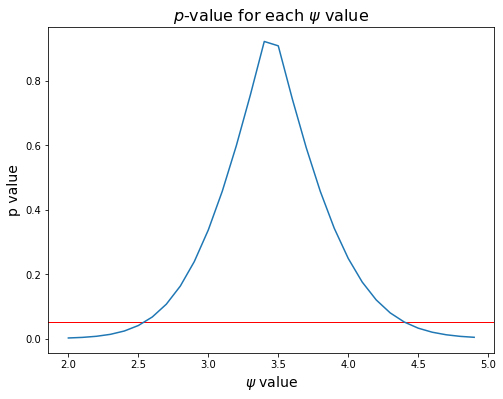

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.axhline(0.05, c='r', linewidth=1)
ax.plot(psi_vals, [g.pvalue for g in g_info])
ax.set_xlabel('$\psi$ value', fontsize=14)
ax.set_ylabel('p value', fontsize=14)
ax.set_title('$p$-value for each $\psi$ value', fontsize=16);

In [22]:
cutoff = 0.05
ci_lo = max([g.psi for g in g_info[:len(g_info)//2] if g.pvalue < cutoff])
ci_hi = min([g.psi for g in g_info[len(g_info)//2:] if g.pvalue < cutoff])

print('95% confidence interval: ({:>0.2f}, {:>0.2f})'.format(ci_lo, ci_hi))

95% confidence interval: (2.50, 4.50)


We can run a finer search between 3.4 and 3.5, with steps of 0.001. That can be done using the same steps as above, but using

```
psi_vals = np.arange(3.4, 3.5, 0.001)
```

Here, we'll use automatic function optimization to find a more exact $\psi$.

The second cell below can take a while to run.

In [23]:
def just_abs_alpha(psi):
    g_info = logit_g_info(psi, nhefs, nhefs.qsmk, X_cols, ip_censor)
    return g_info.abs_alpha

In [24]:
scipy.optimize.minimize(
    fun=just_abs_alpha,
    x0=4.0
)

      fun: 1.2423094722888098e-10
 hess_inv: array([[3.96249031e-07]])
      jac: array([0.00212878])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 270
      nit: 2
     njev: 86
   status: 2
  success: False
        x: array([3.4458988])

The x value in the output is the estimated $\psi$, which rounds to 3.446, as expected

### Program 14.3

We can solve for $\psi$ directly. From Technical Point 14.2, we have

$$
\hat\psi = \frac{
    \sum_{i=1}^{N} W_i^C Y_i\left( A_i - \mathrm{E}[A|L_i]\right)
}{
    \sum_{i=1}^{N} W_i^C A_i\left( A_i - \mathrm{E}[A|L_i]\right)
},
$$

where the sum is over the uncensored observations, $W^C$ is the IP weights, $Y$ is `wt82_71`, $A$ is `qsmk`, and $\mathrm{E}[A|L_i]$ is the predicted `qsmk` from the model below.

In [25]:
A = nhefs.qsmk
X = nhefs[[
    'constant',
    'sex', 'race', 'age', 'age^2', 'edu_2', 'edu_3', 'edu_4', 'edu_5',
    'smokeintensity', 'smokeintensity^2', 'smokeyrs', 'smokeyrs^2', 
    'exercise_1', 'exercise_2', 'active_1', 'active_2', 'wt71', 'wt71^2',
]]

In [26]:
glm = sm.GLM(
    A,
    X,
    freq_weights=ip_censor,
    family=sm.families.Binomial()
)
res = glm.fit()

In [27]:
res.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

Using the equation at the top of this section, $\hat{\psi}$ is calculated as below

In [28]:
A_pred = res.predict(X)
Y = nhefs.wt82_71

estimate = (
    (ip_censor * Y * (A - A_pred)).sum() /
    (ip_censor * A * (A - A_pred)).sum()
)

In [29]:
estimate

3.4458988033695004

"If $\psi$ is D-dimensional..."

The following is a direct translation of what's in the R and Stata code examples

In [30]:
diff = A - A_pred
diff2 = ip_censor * diff

In [31]:
lhs = np.array([
    [
        (A * diff2).sum(),
        (A * nhefs.smokeintensity  * diff2).sum()
    ],
    [
        (A * nhefs.smokeintensity * diff2).sum(), 
        (A * nhefs.smokeintensity**2 * diff2).sum()
    ]
])

lhs

array([[   292.07618742,   5701.54685801],
       [  5701.54685801, 153044.85432632]])

In [32]:
rhs = np.array([
    [(Y * diff2).sum()],
    [(Y * nhefs.smokeintensity * diff2).sum()]
])

rhs

array([[ 1006.46498471],
       [20901.06799989]])

In [33]:
psi = np.linalg.solve(lhs,rhs)
psi

array([[2.85947039],
       [0.03004128]])